# Chapter 3 - Reuters Headlines Multiclass Classification

In [1]:
import random
import numpy as np
from keras import Sequential
from keras.layers import Dense
from keras.datasets import reuters
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical

## Load Datasets

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## Decode Headlines to English

In [3]:
def decode_to_english(sequence):

  word_index = reuters.get_word_index()
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])
  
  return decoded_review

index = random.randint(0, len(train_data))
sequence = train_data[index]
decoded_sequence = decode_to_english(sequence = sequence)

print(f'Sequence: {sequence}\nDecoded Sequence: {decoded_sequence}')

Sequence: [1, 4, 558, 446, 706, 6, 2294, 4, 37, 38, 1973, 2803, 31, 10, 73, 298, 6, 1099, 16, 172, 576, 31, 141, 1973, 5566, 37, 38, 66, 1341, 1877, 1132, 8, 4, 73, 298, 33, 1144, 269, 1357, 43, 4949, 2, 9, 95, 2, 8781, 73, 2, 1357, 45, 2199, 1204, 185, 4, 143, 2803, 34, 9313, 126, 124, 206, 301, 1132, 8, 4, 2, 298, 43, 4, 73, 2803, 23, 528, 33, 455, 1973, 5566, 9, 2, 6, 668, 4, 724, 289, 1266, 5, 973, 9, 2507, 51, 77, 209, 219, 69, 4, 314, 140, 5, 2071, 1132, 8, 234, 973, 33, 1310, 16, 550, 3160, 6, 605, 31, 68, 2, 1338, 298, 97, 4, 3148, 5, 8637, 647, 50, 77, 189, 1342, 36, 8, 4, 73, 298, 273, 134, 206, 5, 6795, 676, 6, 1911, 4, 8605, 1973, 2803, 1132, 8, 106, 9, 218, 1297, 55, 267, 21, 563, 22, 1973, 9058, 9, 4, 73, 298, 33, 1160, 7009, 5, 66, 3067, 9, 4, 1352, 5, 534, 532, 36, 8, 758, 441, 2696, 6, 1099, 125, 2603, 136, 4, 73, 298, 31, 69, 327, 133, 6, 2615, 4, 298, 27, 110, 448, 17, 12]
Decoded Sequence: ? the administration asked congress to replace the u s tariff schedule with a

## Manual One-Hot-Encoding

In [4]:
def vectorize_sequence(sequences, dimension = 10000):  
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

## Build the Model

In [5]:
def build_model(dim):
  model = Sequential()

  # Add layers
  model.add(Dense(units = 64, activation = 'relu', input_shape = (dim, )))
  model.add(Dense(units = 64, activation = 'relu'))
  model.add(Dense(units = 46, activation = 'softmax'))

  # Compile model
  model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [6]:
def train_model(model, x_train, y_train, epochs, batch_size, validation_split):
  history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = validation_split, verbose = 2)
  return history

## Graph Training Process

In [7]:
def plot(ax, history, metric):
  ax.set_title(f'{metric} per Epoch')
  ax.plot(history.history[metric], label = metric)
  ax.plot(history.history['val_' + metric], 'ro', label = f'Validation {metric}')
  ax.legend()  

## Evaluate the Model

In [8]:
def evaluate_model(model, x_test, y_test):
  results = model.evaluate(x_test, y_test, verbose = 0)
  return results

## Making Predictions

In [9]:
def predict(model, sequence):
  return model.predict(sequence)

## Wrap Up

In [10]:
# Vectorize training data
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

# Convert labels to numpy array
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Epoch 1/10
16/16 - 16s - loss: 2.5733 - accuracy: 0.5420 - val_loss: 1.7931 - val_accuracy: 0.6596
Epoch 2/10
16/16 - 1s - loss: 1.3953 - accuracy: 0.7117 - val_loss: 1.3869 - val_accuracy: 0.7130
Epoch 3/10
16/16 - 1s - loss: 1.0402 - accuracy: 0.7762 - val_loss: 1.2468 - val_accuracy: 0.7197
Epoch 4/10
16/16 - 1s - loss: 0.8180 - accuracy: 0.8269 - val_loss: 1.1580 - val_accuracy: 0.7497
Epoch 5/10
16/16 - 1s - loss: 0.6584 - accuracy: 0.8577 - val_loss: 1.0703 - val_accuracy: 0.7642
Epoch 6/10
16/16 - 1s - loss: 0.5283 - accuracy: 0.8874 - val_loss: 1.0300 - val_accuracy: 0.7742
Epoch 7/10
16/16 - 1s - loss: 0.4256 - accuracy: 0.9103 - val_loss: 1.0401 - val_accuracy: 0.7709
Epoch 8/10
16/16 - 1s - loss: 0.3479 - accuracy: 0.9264 - val_loss: 1.0213 - val_accuracy: 0.7920
Epoch 9/10
16/16 - 1s - loss: 0.2851 - accuracy: 0.9393 - val_loss: 1.0199 - val_accuracy: 0.7920
Epoch 10/10
16/16 - 1s - loss: 0.2416 - accuracy: 0.9472 - val_loss: 1.0008 - val_accuracy: 0.7931
Model: "sequential

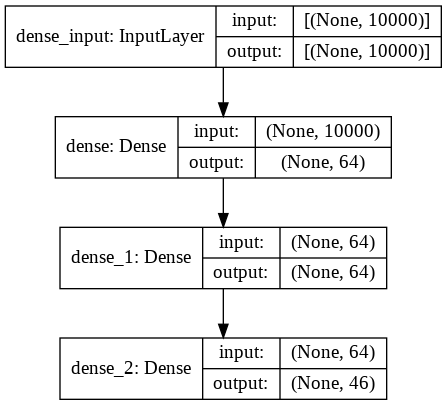

In [11]:
# Build and train the model
model = build_model(dim = x_train.shape[1])

history = train_model(
    model = model,
    x_train = x_train, 
    y_train = y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.1
)

model.summary()
plot_model(model, show_shapes = True)  

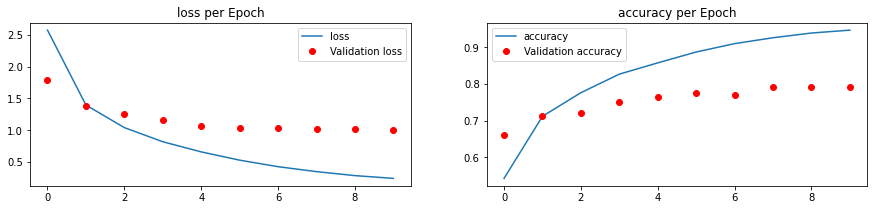

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 3))

# Graph training process
plot(ax[0], history, 'loss')
plot(ax[1], history, 'accuracy')
plt.show()

In [13]:
# Evaluate the model
loss, acc = evaluate_model(model, x_test, y_test)
print(f'Loss: {round(loss, 2)}, Accuracy: {round(acc * 100, 2)}%')

Loss: 0.96, Accuracy: 78.98%


In [14]:
# Prediction
pred = predict(model, x_test[:1])

text = decode_to_english(test_data[0])
print('Text:', ' '.join(text.replace('?', '').split()))

print(np.argmax(pred))

Text: the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to growth and expansion plans for inc and inc over the next two years a and p said the acquisition of in august 1986 and in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt of west germany reuter 3
3
